In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, recall_score, precision_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(display='diagram')

ModuleNotFoundError: No module named 'seaborn'

In [2]:
df = pd.read_csv('../Data/bigml_59c28831336c6604c800002a.csv')

In [3]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [4]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
df_510 = df[df['area code'] == 510]

In [6]:
sns.scatter(df_510[])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3514187299.py, line 1)

In [7]:
#sns.pairplot(df, hue = 'churn')

<Axes: >

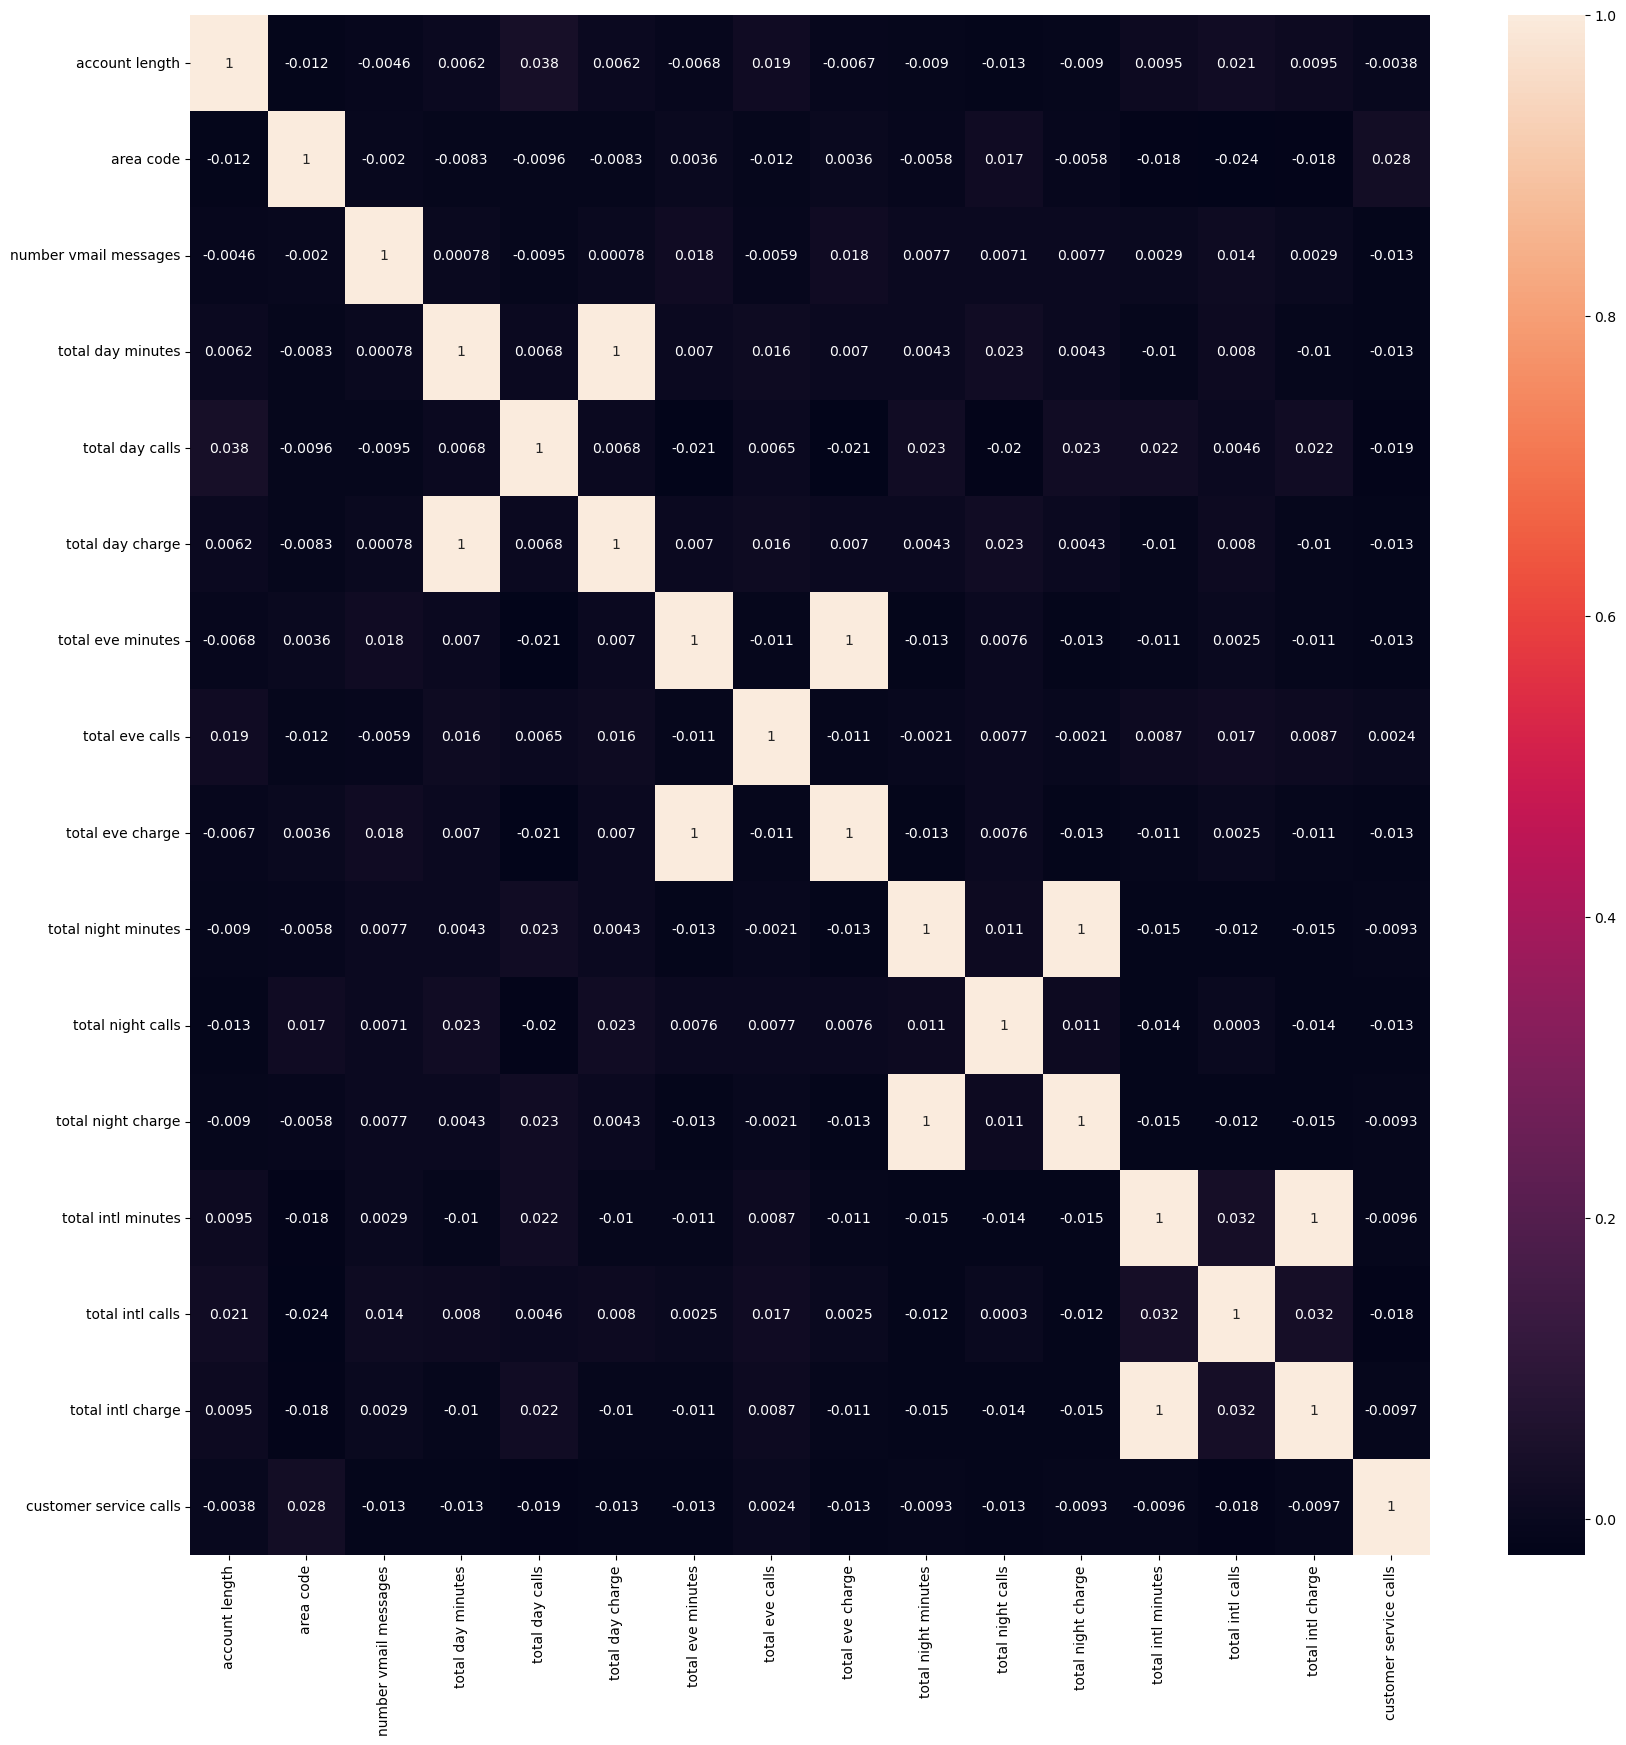

In [8]:
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(df.drop(columns = ['state','phone number', 'international plan', 'voice mail plan', 'churn']).corr(), annot = True)

In [ ]:
df.drop(columns = ['phone number', 'total day charge', 'total eve charge','total night charge', 'total intl charge'], inplace = True)

In [ ]:
le = LabelEncoder()
le.fit(df['churn'])
df['churn'] = le.transform(df['churn'])

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [ ]:
X = df.drop(columns = "churn", axis = 1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 24)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

nominal_pipeline = Pipeline([('one_hot', OneHotEncoder()), ('mm_scaler', MaxAbsScaler())])
numeric_pipeline = Pipeline([(('std_scaler'), StandardScaler())])

num_cols = X_train.select_dtypes(['int', 'float']).columns

ct = ColumnTransformer([('nominalpipe', nominal_pipeline, ['state', 'area code', 'international plan', 'voice mail plan']), 
                        ('numpipe', numeric_pipeline, num_cols)])


pipe = Pipeline([('preprocessing', ct), ('model', LogisticRegression(random_state = 24))])


In [ ]:
pipe.fit(X_train, y_train)

In [ ]:
y_pred_fsm = pipe.predict(X_train)
print(classification_report(y_train, y_pred_fsm))

In [ ]:
y_pred_test_fsm = pipe.predict(X_test)
print(classification_report(y_test, y_pred_test_fsm))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix #nice function to visualize confusion matrix

In [ ]:
cm = confusion_matrix(y_train, y_pred_fsm)
ConfusionMatrixDisplay(cm).plot();

In [ ]:
cm = confusion_matrix(y_test, y_pred_test_fsm)
ConfusionMatrixDisplay(cm).plot();

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay

In [ ]:
fig,ax = plt.subplots()

RocCurveDisplay.from_estimator(pipe, X_test, y_test, ax = ax);
#RocCurveDisplay.from_predictions(y_test, y_pred_test_fsm, ax = ax);

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MaxAbsScaler
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE, RandomOverSampler

smote = SMOTE(random_state = 24)
ros = RandomOverSampler(random_state = 24)

nominal_pipeline = Pipeline([('one_hot', OneHotEncoder()), ('maxab_scaler', MaxAbsScaler())])
numeric_pipeline = Pipeline([(('std_scaler'), StandardScaler())])

num_cols = X_train.select_dtypes(['int', 'float']).columns

ct = ColumnTransformer([('nominalpipe', nominal_pipeline
                         , ['state', 'area code','international plan', 'voice mail plan']), 
                        ('numpipe', numeric_pipeline, num_cols)])


ros_pipe = Pipeline([('preprocessing', ct), ('sampling', ros), ('model', LogisticRegression(random_state = 24, max_iter = 10*100))])


In [ ]:
ros_pipe.fit(X_train, y_train)

In [ ]:
fsm_ros = ros_pipe.predict(X_train)
print(classification_report(y_train, fsm_ros))

In [ ]:
fsm_test_ros = ros_pipe.predict(X_test)
print(classification_report(y_test, fsm_test_ros))

In [ ]:
roc_auc_score(y_test, fsm_test_ros)

In [ ]:
fig,ax = plt.subplots()

 .from_estimator(pipe, X_test, y_test, ax = ax);
RocCurveDisplay.from_estimator(ros_pipe, X_test, y_test, ax = ax);


In [ ]:
grid = [{'model__C': [.001, .01, 1, 10, 100],
         'sampling__sampling_strategy': [ .5, .7, 1]}
       ]

In [ ]:
gridsearch = GridSearchCV(pipe, grid, scoring = 'recall', cv = 4)

In [ ]:
gridsearch.fit(X_train, y_train)

In [ ]:
gridsearch.best_params_

In [ ]:
best_model_log = gridsearch.best_estimator_

In [ ]:
ros_tune = best_model_log.predict(X_train)

In [ ]:
print(classification_report(y_train, ros_tune))

In [ ]:
y_pred_ros_tune = best_model_log.predict(X_test)

In [ ]:
fig,ax = plt.subplots()

RocCurveDisplay.from_predictions(y_test, y_pred_test_fsm, ax = ax);
RocCurveDisplay.from_predictions(y_test, fsm_test_ros, ax = ax);
RocCurveDisplay.from_predictions(y_test, y_pred_ros_tune, ax = ax);

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
second_nominalpipe = Pipeline([('one_hot', OneHotEncoder())])

ctRF = ColumnTransformer([('secondnominalpipe', second_nominalpipe
                , ['state', 'area code', 'international plan', 'voice mail plan'])], remainder = 'passthrough')
                          
secondpipe = Pipeline([('preprocessing', ctRF), ('sampling', ros),
                       ('model', RandomForestClassifier(random_state = 24))])

In [ ]:
secondpipe

In [ ]:
secondpipe.fit(X_train, y_train)

In [ ]:
RF_predict = secondpipe.predict(X_train)
print(classification_report(y_train, RF_predict))

# OVERFITTING!

In [ ]:
RF_predict_test = secondpipe.predict(X_test)
print(classification_report(y_test, RF_predict_test))

In [ ]:
RFgrid = [{"model__criterion" : ["gini", "entropy"],
           "model__n_estimators": [10, 30, 60, 80, 100],
                "model__max_depth": [2,3,4,5,6,8,10, None],
                "model__min_samples_split": [2,5,6,8,10],
                "model__min_samples_leaf": [1,2,3,4,5,6,10,15],
         'sampling__sampling_strategy': [.7, .9, 1]}
       ]

In [ ]:
RFrandomsearch = RandomizedSearchCV(secondpipe, RFgrid, scoring = 'recall', n_iter = 20, cv = 4)

In [ ]:
RFrandomsearch.fit(X_train, y_train)

In [ ]:
randomcv_results = pd.DataFrame(RFrandomsearch.cv_results_)
randomcv_results.sort_values('rank_test_score').head()

In [ ]:
RFrandomsearch.best_estimator_

In [ ]:
randomRF_best_model = RFrandomsearch.best_estimator_

In [ ]:
RFrandomsearch.best_params_

In [ ]:
y_pred_RF = randomRF_best_model.predict(X_train)

In [ ]:
print(classification_report(y_train, y_pred_RF))

In [ ]:
print(classification_report(y_test, randomRF_best_model.predict(X_test)))

In [ ]:
fsm_auc = round(roc_auc_score(y_test, y_pred_test_fsm), 2)

In [ ]:
log_model_ros_auc = round(roc_auc_score(y_test, fsm_test_ros), 2)

In [ ]:
RF_rscv_auc = round(roc_auc_score(y_test, y_pred_RF_rscv), 2)

In [ ]:
y_pred_RF_rscv = randomRF_best_model.predict(X_test)

In [ ]:
fig,ax = plt.subplots()

RocCurveDisplay.from_predictions(y_test, y_pred_test_fsm, label = f'FSM Logistic Regression Model (AUC = {fsm_auc})',ax = ax)
RocCurveDisplay.from_predictions(y_test, fsm_test_ros, label = f'ROS Logistic Regression Model (AUC = {log_model_ros_auc})', ax = ax)
RocCurveDisplay.from_predictions(y_test, y_pred_RF_rscv, label =  f'Random Forest Model (AUC = {RF_rscv_auc})', ax = ax);


In [ ]:
secondpipe.named_steps['preprocessing'].transformers_[0][1].named_steps['one_hot'].get_feature_names()

In [ ]:
columns_names = ['x0_AK', 'x0_AL', 'x0_AR', 'x0_AZ', 'x0_CA', 'x0_CO', 'x0_CT',
'x0_DC', 'x0_DE', 'x0_FL', 'x0_GA', 'x0_HI', 'x0_IA', 'x0_ID',
'x0_IL', 'x0_IN', 'x0_KS', 'x0_KY', 'x0_LA', 'x0_MA', 'x0_MD',
'x0_ME', 'x0_MI', 'x0_MN', 'x0_MO', 'x0_MS', 'x0_MT', 'x0_NC',
'x0_ND', 'x0_NE', 'x0_NH', 'x0_NJ', 'x0_NM', 'x0_NV', 'x0_NY',
'x0_OH', 'x0_OK', 'x0_OR', 'x0_PA', 'x0_RI', 'x0_SC', 'x0_SD',
'x0_TN', 'x0_TX', 'x0_UT', 'x0_VA', 'x0_VT', 'x0_WA', 'x0_WI',
'x0_WV', 'x0_WY', 'account length', 'x1_408', 'x1_415', 'x1_510', 'x2_no', 'x2_yes',
'x3_no', 'x3_yes', 'number vmail messages', 'total day minutes', 'total day calls',
'total eve minutes', 'total eve calls', 'total night minutes', 'total night calls',
'total intl minutes', 'total intl calls', 'customer service calls']

In [ ]:
feature_imp = randomRF_best_model['model'].feature_importances_

feat_imp_series = pd.Series(feature_imp, index = columns_names).sort_values(ascending = False)
feat_imp_series.nlargest(15).plot(kind = 'bar');

In [ ]:
#Results from random forest search


In [ ]:
RFgrid_GS = {'sampling__sampling_strategy': [1],
 'model__n_estimators': [80, 100],
 'model__min_samples_split': [2,5,6,8,10],
 'model__min_samples_leaf': [4, 6, 10, 12],
 'model__max_depth': [5, 6, 8, 10],
 'model__criterion': ['gini', 'entropy']}
RFgridsearch = GridSearchCV(secondpipe, RFgrid_GS, scoring = 'recall', cv = 4)


In [ ]:
RFgridsearch.fit(X_train, y_train)

In [ ]:
RFgridsearch.best_params_

In [ ]:
RFgridsearch.best_score_

In [ ]:
RF_gs_best_model = RFgridsearch.best_estimator_

In [ ]:
RFgridsearch.best_estimator_

In [ ]:
RF_gs_best_model_pred = RF_gs_best_model.predict(X_train)

In [ ]:
print(classification_report(y_train, RF_gs_best_model_pred))

In [ ]:
print(classification_report(y_test, RF_gs_best_model.predict(X_test)))

In [ ]:
y_pred_RD_gs = RF_gs_best_model.predict(X_test)

In [ ]:
RF_rscv_auc = round(roc_auc_score(y_test, RF_gs_best_model.predict(X_test)), 2)

In [ ]:
fig,ax = plt.subplots()

RocCurveDisplay.from_predictions(y_test, y_pred_test_fsm, label = f'FSM Logistic Regression Model (AUC = {fsm_auc})',ax = ax)
RocCurveDisplay.from_predictions(y_test, fsm_test_ros, label = f'ROS Logistic Regression Model (AUC = {log_model_ros_auc})', ax = ax)
RocCurveDisplay.from_predictions(y_test, y_pred_RF_rscv, label =  f'Random Forest Randomized Model (AUC = {RF_rscv_auc})', ax = ax);
RocCurveDisplay.from_predictions(y_test, y_pred_RD_gs, label =  f'Random Forest Grid Search Model (AUC = {RF_rscv_auc})', ax = ax);



In [ ]:
from xgboost import XGBClassifier

In [ ]:
third_nominalpipe = Pipeline([('one_hot', OneHotEncoder())])

ctxgb = ColumnTransformer([('secondnominalpipe', third_nominalpipe, ['state', 'area code', 'international plan', 'voice mail plan'])], remainder = 'passthrough')
                          
thirdpipe = Pipeline([('preprocessing', ctxgb), ('sampling', ros), ('model', XGBClassifier(max_depth = 2, random_state = 24))])

In [ ]:
thirdpipe.fit(X_train, y_train)

In [ ]:
xgb_y_pred_train = thirdpipe.predict(X_train)

In [ ]:
print(classification_report(y_train, xgb_y_pred_train))

In [ ]:
print(classification_report(y_test, thirdpipe.predict(X_test)))

In [ ]:
params = {"model__max_depth": [1, 2, 3, 4, 5, 6],
         "model__n_estimators": [50, 100, 150, 200, 300, 400],
         "model__learning_rate": [.001, .01, .05, .1, .5, 1],
         "model__gamma": [0, 10, 20, 40, 60, 80, 100],
         "model__colsample_bytree": [.5, .6, .8, .9, 1]}

xgbrandomgridsearch = RandomizedSearchCV(thirdpipe, params, scoring = "recall", n_iter = 20,  cv = 4)

In [ ]:
xgbrandomgridsearch.fit(X_train, y_train)

In [ ]:
randomxgbcv_results = pd.DataFrame(xgbrandomgridsearch.cv_results_)
randomxgbcv_results.sort_values('rank_test_score').head()

In [ ]:
grid_search_params = {"model__max_depth": [3, 4, 5, 6],
         "model__n_esitimators": [50, 100, 150, 200, 250, 275, 300, 350],
         "model__learning_rate": [.001, .005, .008, .01, .03, .05, .07, .1, .25, .5,],
         "model__gamma": [10, 40, 50, 60, 65, 70, 75, 80,],
         "model__colsample_bytree": [.5, .6, .7, .8, .9, 1]}
xgbgridsearch = GridSearchCV(thirdpipe, grid_search_params, scoring = 'recall', cv = 3)